In [1]:
import pandas, warnings

import seaborn as sns

import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

sns.set_style("whitegrid")

In [2]:
colors = ["#BC9F8B", "#B5CFB7", "#C5705D", "#ACE1AF", "#B3C8CF"]

def barplot(result, **barlimit):
  if "ylabel" not in barlimit.keys():
    barlimit["ylabel"] = "Total Trip"
  if "color" not in barlimit.keys():
    barlimit["color"] = colors
  bar = result.plot.bar(rot=0, **barlimit)
  bar.bar_label(bar.containers[0], fmt="%1.1f");

def pieplot(result, **pieargs):
  if "colors" not in pieargs.keys():
    pieargs["colors"] = colors
  plot = result.plot.pie(**pieargs);

def lineplot(result, **lineargs):
  plot = result.plot.line(**lineargs)
  plot.set_xticks(result.index);

In [3]:
url = "/content/originsales.csv"

origin = pandas.read_table(url, sep=",", parse_dates=["order_date", "ship_date"])

origin.iloc[:5, :7]

,order_id,order_date,ship_date,ship_mode,customer_id,customer,segment
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer


In [4]:
origin.iloc[:5, 7:13]

,country,city,state,postal_code,region,product_id
0,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798
1,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454
2,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240
3,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577
4,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760


In [5]:
origin.iloc[:5, 13:]

,category,sub_category,product,sales
0,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [6]:
origin.isnull().sum().sum()

0

In [7]:
year = origin.order_date.dt.year

yearval = {"sales":"sum", "order_id":"nunique"}

columns = {"sales":"total_sales", "order_id":"total_order"}

yearly = origin.groupby(year).agg(yearval).rename(columns=columns)

yearly

,total_sales,total_order
order_date,,
2015,479856.2081,947
2016,459436.0054,1019
2017,600192.5500,1295
2018,722052.0192,1661


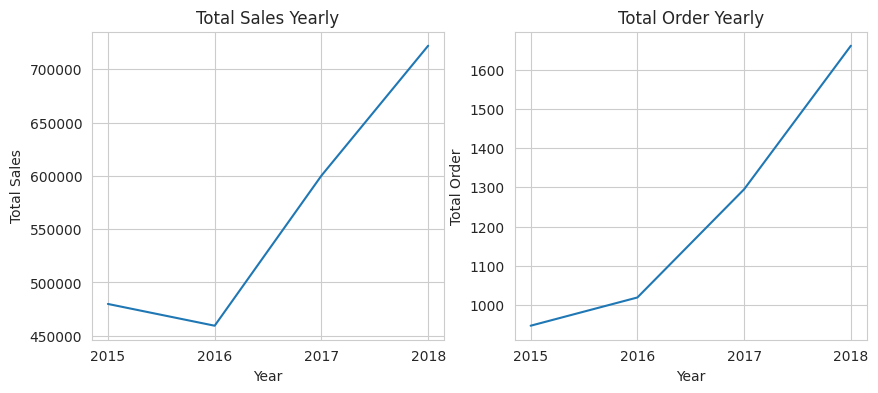

In [8]:
ylabel_one = "Total Sales"

ylabel_ore = "Total Order"

title_one = ylabel_one + " Yearly"

title_ore = ylabel_ore + " Yearly"

xlabel = "Year"

cate, axes = plt.subplots(1, 2, figsize=(10, 4))

lineplot(yearly.total_sales, title=title_one, ylabel=ylabel_one, xlabel=xlabel, ax=axes[0])

lineplot(yearly.total_order, title=title_ore, ylabel=ylabel_ore, xlabel=xlabel, ax=axes[1])